# PyTorch Computer Vision Exercises

In [1]:
# Import torch
import torch

print( torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print( device)

2.2.2+cu121
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Healthcare (Medical imaging, diagnosis, etc.)
2. Surveilance and Monitoring
3. Agriculture (Crop monitoring)
4. Automobile Engineering
5. Automated production

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting occurs when the model cannot generalize and fits too closely to the training dataset instead.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Early Stopping:** early stopping pauses the training phase before machine learning model learns the noise in the data.

2. **Pruning:** feature selection -or pruning- identifies the most important features within the training set and eliminates irrelevant ones.

3. **Regularization:** a collection of training/optimization techniques that seek to reduce overfitting by trying to eliminate those factors that do not impact the prediction outcomes by grading features based on importance.

4. **Ensembling:** ensembling combines prediction from several seperate machine learning algorithms which are called weak learners because their results are often inaccurate. Ensemble methods combine all the weak learners to get more accurate results.

5. **Data Augmentation:** it is a technique that changes the sample data slightly every time the model processes it. when done in moderation, data augmentation makes the training sets appear unique to the model and prevents the model from learning their characteristics i.e. overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
	root="data",
	train=True,
	download=True,
	transform=ToTensor(),
	target_transform=None
)

test_data = datasets.MNIST(
	root="data",
	train=False,
	download=True,
	transform=ToTensor(),
	target_transform=None
)

In [3]:
len( train_data), len( test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes

class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
img, lbl = train_data[ 0]

print( img.shape)
print( lbl)

torch.Size([1, 28, 28])
5


## 6. Visualize at least 5 different samples of the MNIST training dataset.

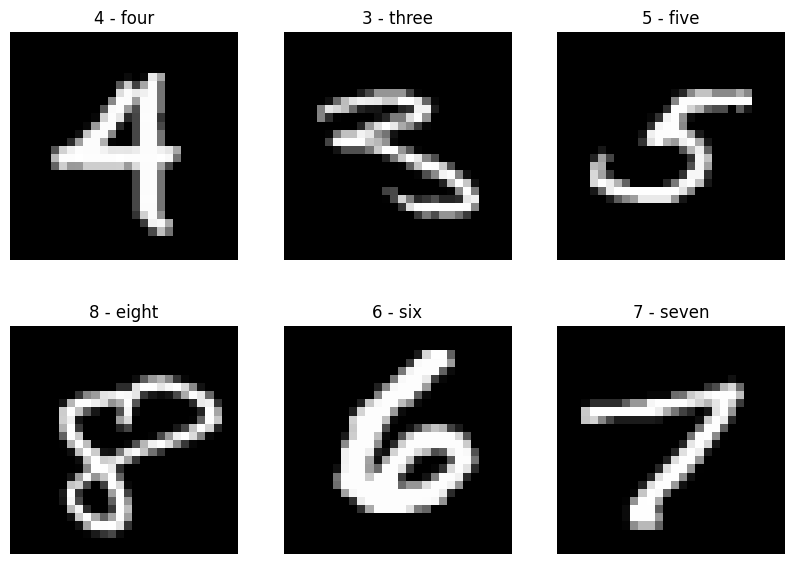

In [7]:
import matplotlib.pyplot as plt
import random

samples = random.sample( range( len( train_data)), k=6)

plt.figure( figsize=( 10, 7))

nrows = 2
ncols = 3

for i, sample in enumerate( samples):
	image, label = train_data[ sample]

	plt.subplot( nrows, ncols, i + 1)

	plt.imshow( image.squeeze(), cmap="gray")

	plt.axis( False)

	plt.title( class_names[ label])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
	dataset=train_data,
	batch_size=BATCH_SIZE,
	shuffle=True
)

test_dataloader = DataLoader(
	dataset=test_data,
	batch_size=BATCH_SIZE,
	shuffle=False
)

In [9]:
print( f"Train DataLoader: { train_dataloader}")
print( f"Test DataLoader: { test_dataloader}")

print( f"Length of train_dataloader: { len( train_dataloader)} batches of { BATCH_SIZE}")
print( f"Length of test_dataloader: { len( test_dataloader)} batches of { BATCH_SIZE}")

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x00000239C5DEBF90>
Test DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x00000239C620E1D0>
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
from torch import nn

class MNISTModel( nn.Module):

	def __init__( self, input_shape: int, hidden_units: int, output_shape: int):

		super().__init__()

		self.conv_block_1 = nn.Sequential(
			nn.Conv2d( in_channels=input_shape,
					   out_channels=hidden_units,
					   kernel_size=3,
					   stride=1,
					   padding=1),
			nn.ReLU(),
			nn.Conv2d( in_channels=hidden_units,
					   out_channels=hidden_units,
					   kernel_size=3,
					   stride=1,
					   padding=1),
			nn.ReLU(),
			nn.MaxPool2d( kernel_size=2)
		)

		self.conv_block_2 = nn.Sequential(
			nn.Conv2d( in_channels=hidden_units,
					   out_channels=hidden_units,
					   kernel_size=3,
					   stride=1,
					   padding=1),
			nn.ReLU(),
			nn.Conv2d( in_channels=hidden_units,
					   out_channels=hidden_units,
					   kernel_size=3,
					   stride=1,
					   padding=1),
			nn.ReLU(),
			nn.MaxPool2d( kernel_size=2)
		)

		self.classifier = nn.Sequential(
			nn.Flatten(),
			nn.Linear( in_features=hidden_units * 7 * 7,
			 		   out_features=output_shape)
		)

	def forward( self, x):
		x = self.conv_block_1( x)
		# print( x.shape)
		x = self.conv_block_2( x)
		# print( x.shape)
		x = self.classifier( x)
		# print( x.shape)
		return x

In [11]:
torch.manual_seed( 42)

temp_model = MNISTModel( input_shape=1, hidden_units=10, output_shape=len( class_names))

temp_model.to( device)

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [12]:
rand_image_tensor = torch.randn( size=( 1, 28, 28))

temp_model( rand_image_tensor.unsqueeze( 0).to( device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

### 9.1 Timer

In [13]:
from timeit import default_timer as timer

def time():
	return timer()

def total_time( start: float, end: float, device: torch.device = device, verbose=0):
	total_time = end - start

	if verbose != 0:
		print( f"Train time on { device}: { total_time:3f} seconds")

	return total_time

### 9.2 Accuracy function

In [14]:
from helper_functions import accuracy_fn

### 9.3 Train step

In [15]:
def train_step( model: nn.Module,
			    dataloader: DataLoader,
				loss_fn: nn.Module,
				optimizer: torch.optim.Optimizer,
				accuracy_fn=accuracy_fn,
				device: torch.device=device,
				verbose=0):
	
	train_loss, train_acc = 0, 0

	N = len( dataloader)

	model.train()

	for X, y in dataloader:

		X, y = X.to( device), y.to( device)

		# 1. Forward pass
		y_pred = model( X)

		# 2. Calculate the loss and accuracy (per batch)
		loss = loss_fn( y_pred, y)
		train_loss += loss
		train_acc += accuracy_fn( y_true=y,
								  y_pred=y_pred.argmax( dim=1))
		
		# 3. Optimizer zero grad
		optimizer.zero_grad()

		# 4. Loss backward
		loss.backward()

		# 5. Optimizer step
		optimizer.step()

	train_loss /= N
	train_acc /= N

	if verbose != 0:
		print( f"Train Loss: { train_loss:.5f} | Train Accuracy: { train_acc:.4f}%")

	return train_loss.item(), train_acc

### 9.4 Test step

In [16]:
def test_step( model: nn.Module,
			   dataloader: DataLoader,
			   loss_fn: nn.Module,
			   accuracy_fn=accuracy_fn,
			   device: torch.device=device,
			   verbose=0):
	
	test_loss, test_acc = 0, 0

	N = len( dataloader)

	model.eval()

	with torch.inference_mode():
		for X, y in dataloader:

			X, y = X.to( device), y.to( device)

			# 1. Forward pass
			y_pred = model( X)

			# 2. Calculate loss/acc
			test_loss += loss_fn( y_pred, y)
			test_acc += accuracy_fn( y_true=y,
									 y_pred=y_pred.argmax( dim=1))
			
		test_loss /= N
		test_acc /= N

		if verbose != 0:
			print( f"Test Loss: { test_loss:.5f} | Test Accuracy: { test_acc:.4f}%")

	return test_loss.item(), test_acc

### 9.5 Fit function

In [17]:
from tqdm.auto import tqdm

def fit( model: nn.Module,
		 train_dataloader: DataLoader,
		 val_dataloader: DataLoader,
		 epochs: int,
		 loss_fn: nn.Module,
		 optimizer: torch.optim.Optimizer,
		 accuracy_fn=accuracy_fn,
		 device: torch.device=device,
		 verbose=0,
		 seed=42):
	
	torch.manual_seed( seed)
	torch.cuda.manual_seed( seed)

	history = {
		"loss": [],
		"acc": [],
		"val_loss": [],
		"val_acc": []
	}

	start = time()

	for epoch in tqdm( range( epochs)):

		print( f"\nEpoch: { epoch + 1}\n----------")

		loss, acc = train_step( model=model,
			 		dataloader=train_dataloader,
					loss_fn=loss_fn,
					optimizer=optimizer,
					accuracy_fn=accuracy_fn,
					device=device,
					verbose=verbose)
		
		val_loss, val_acc = test_step( model=model,
				   dataloader=val_dataloader,
				   loss_fn=loss_fn,
				   accuracy_fn=accuracy_fn,
				   device=device,
				   verbose=verbose)
		
		history[ "loss"].append( loss)
		history[ "acc"].append( acc)
		history[ "val_loss"].append( val_loss)
		history[ "val_acc"].append( val_acc)

	end = time()

	total = total_time( start=start, end=end, device=device, verbose=verbose)

	return history, total


### 9.6 Model Evaluation

In [18]:
def eval_model( model: nn.Module,
			    dataloader: DataLoader,
				loss_fn: nn.Module,
				accuracy_fn=accuracy_fn,
				device: torch.device=device):
	
	loss, acc = 0, 0

	N = len( dataloader)

	model.eval()

	with torch.inference_mode():
		for X, y in tqdm( dataloader):

			X, y = X.to( device), y.to( device)

			y_pred = model( X)

			loss += loss_fn( y_pred, y)
			acc += accuracy_fn( y_true=y,
								y_pred=y_pred.argmax( dim=1))
			
		loss /= N
		acc /= N

	return {
		"model_name": model.__class__.__name__,
		"model_loss": loss.item(),
		"model_acc": acc
	}

### 9.7 training on CPU

In [19]:
model_cpu = MNISTModel( input_shape=1, hidden_units=10, output_shape=len( class_names)).to( "cpu")

model_cpu

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### 9.7.1 Setup loss function and optimizer

In [20]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( params=model_cpu.parameters(), lr=0.1)

#### 9.7.2 Fitting model

In [21]:
history_cpu, total_train_time_cpu = fit( model=model_cpu,
										 train_dataloader=train_dataloader,
										 val_dataloader=test_dataloader,
										 epochs=5,
										 loss_fn=loss_fn,
										 optimizer=optimizer,
										 accuracy_fn=accuracy_fn,
										 device="cpu",
										 verbose=1)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1
----------
Train Loss: 0.23989 | Train Accuracy: 92.0817%
Test Loss: 0.06988 | Test Accuracy: 97.7236%

Epoch: 2
----------
Train Loss: 0.07345 | Train Accuracy: 97.7183%
Test Loss: 0.05238 | Test Accuracy: 98.4125%

Epoch: 3
----------
Train Loss: 0.05758 | Train Accuracy: 98.2367%
Test Loss: 0.05793 | Test Accuracy: 98.2228%

Epoch: 4
----------
Train Loss: 0.04977 | Train Accuracy: 98.4617%
Test Loss: 0.04810 | Test Accuracy: 98.4026%

Epoch: 5
----------
Train Loss: 0.04287 | Train Accuracy: 98.6500%
Test Loss: 0.04105 | Test Accuracy: 98.6921%
Train time on cpu: 307.771593 seconds


#### 9.7.3 Plotting loss and accuracy curve

In [22]:
import numpy as np

def plot( history):
	loss, val_loss = history[ "loss"], history[ "val_loss"]
	acc, val_acc = history[ "acc"], history[ "val_acc"]

	x = np.arange( 1, len( loss) + 1)

	plt.figure( figsize=( 10, 5))

	plt.subplot( 1, 2, 1)
	plt.title( "Loss")
	plt.xlabel( "Epoch")
	plt.plot( x, loss, label="Train")
	plt.plot( x, val_loss, label="Validation")
	plt.legend()

	plt.subplot( 1, 2, 2)
	plt.title( "Accuracy")
	plt.xlabel( "Epoch")
	plt.plot( x, acc, label="Train")
	plt.plot( x, val_acc, label="Validation")
	plt.legend()

	plt.show()

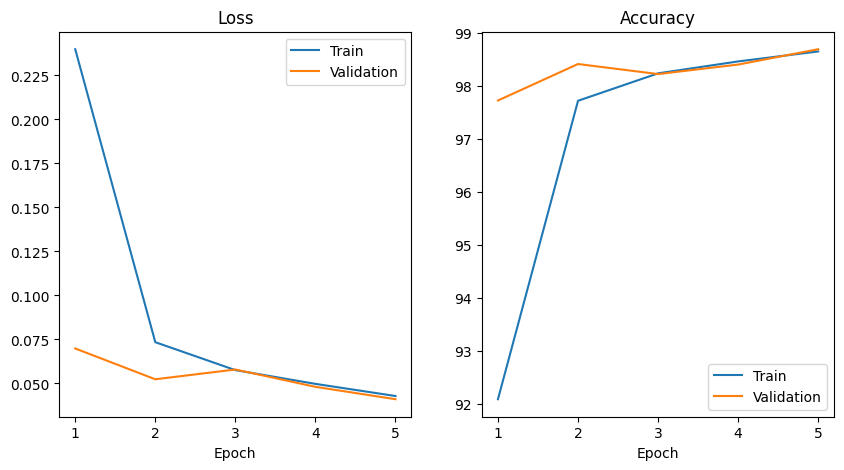

In [23]:
plot( history_cpu)

#### 9.7.4 Evaluate model

In [24]:
model_cpu_results = eval_model( model=model_cpu,
								dataloader=test_dataloader,
								loss_fn=loss_fn,
								accuracy_fn=accuracy_fn,
								device="cpu")

model_cpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.04104901850223541,
 'model_acc': 98.69209265175719}

### 9.8 training on GPU

In [25]:
model_gpu = MNISTModel( input_shape=1, hidden_units=10, output_shape=len( class_names)).to( device)

model_gpu

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### 9.8.1 Setup loss function and optimizer

In [26]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( params=model_gpu.parameters(), lr=0.1)

#### 9.8.2 Fitting model

In [27]:
history_gpu, total_train_time_gpu = fit( model=model_gpu,
										 train_dataloader=train_dataloader,
										 val_dataloader=test_dataloader,
										 epochs=5,
										 loss_fn=loss_fn,
										 optimizer=optimizer,
										 accuracy_fn=accuracy_fn,
										 device=device,
										 verbose=1)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1
----------
Train Loss: 0.35252 | Train Accuracy: 87.8283%
Test Loss: 0.07897 | Test Accuracy: 97.4541%

Epoch: 2
----------
Train Loss: 0.07669 | Train Accuracy: 97.6350%
Test Loss: 0.05609 | Test Accuracy: 98.2029%

Epoch: 3
----------
Train Loss: 0.05919 | Train Accuracy: 98.1500%
Test Loss: 0.05544 | Test Accuracy: 98.3027%

Epoch: 4
----------
Train Loss: 0.05002 | Train Accuracy: 98.4300%
Test Loss: 0.05046 | Test Accuracy: 98.3726%

Epoch: 5
----------
Train Loss: 0.04325 | Train Accuracy: 98.6367%
Test Loss: 0.04750 | Test Accuracy: 98.4525%
Train time on cuda: 127.057575 seconds


#### 9.7.3 Plotting loss and accuracy curve

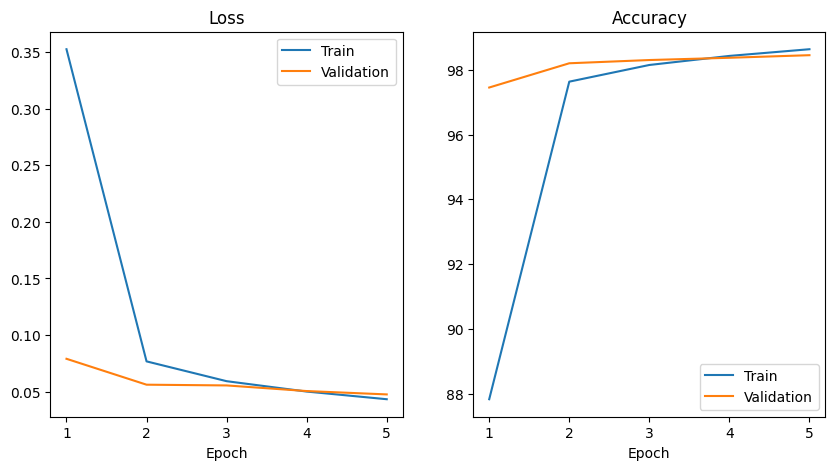

In [28]:
plot( history_gpu)

#### 9.7.4 Evaluate model

In [29]:
model_gpu_results = eval_model( model=model_gpu,
								dataloader=test_dataloader,
								loss_fn=loss_fn,
								accuracy_fn=accuracy_fn,
								device=device)

model_gpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.04750305041670799,
 'model_acc': 98.45247603833866}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [30]:
def make_prediction( model: nn.Module,
					 data: list,
					 device: torch.device = device):
	
	pred_probs = []

	model.eval()

	with torch.inference_mode():
		for sample in data:
			sample = torch.unsqueeze( sample, dim=0).to( device)

			pred_logits = model( sample)

			pred_prob = torch.softmax( pred_logits.squeeze(), dim=0)

			pred_probs.append( pred_prob.cpu())

	return torch.stack( pred_probs)

In [31]:
test_samples = []
test_labels = []

for sample, label in random.sample( list( test_data), k=9):
	test_samples.append( sample)
	test_labels.append( label)

test_samples[ 0].shape

torch.Size([1, 28, 28])

In [32]:
pred_probs = make_prediction( model=model_gpu,
							  data=test_samples)

pred_probs[ :2]

tensor([[1.4737e-06, 5.8577e-04, 4.2841e-07, 1.3493e-02, 9.3703e-01, 1.3306e-03,
         1.4166e-06, 6.5964e-03, 1.8280e-03, 3.9128e-02],
        [9.9994e-01, 1.2432e-10, 1.4844e-05, 2.6293e-09, 6.7831e-06, 7.3183e-11,
         2.7705e-05, 8.8815e-11, 1.0106e-05, 4.7870e-08]])

In [33]:
pred_classes = pred_probs.argmax( dim=1)

pred_classes[ :2]

tensor([4, 0])

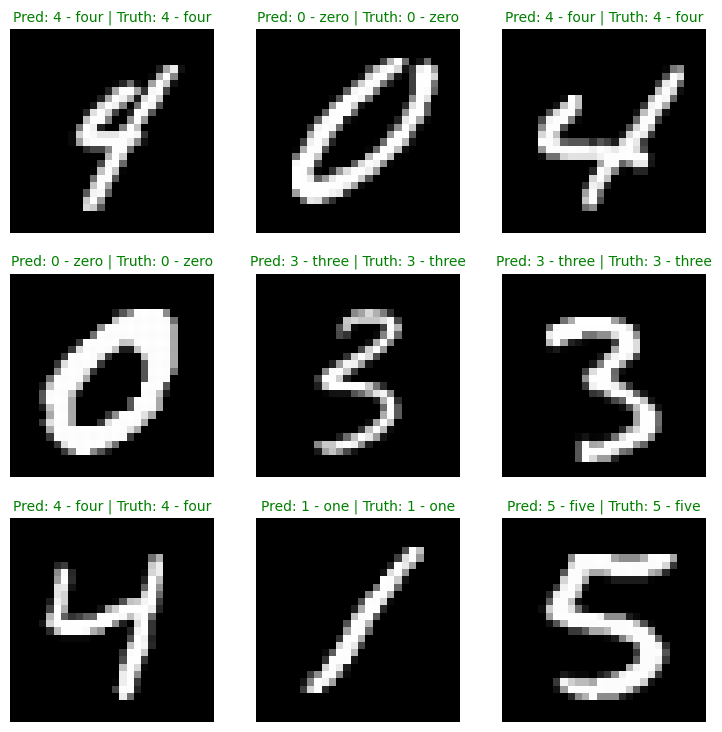

In [34]:
plt.figure( figsize=( 9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate( test_samples):
	plt.subplot( nrows, ncols, i + 1)

	plt.imshow( sample.squeeze(), cmap="gray")

	plt.axis( False)

	pred_label = class_names[ pred_classes[ i]]

	truth_label = class_names[ test_labels[ i]]

	title_text = f"Pred: { pred_label} | Truth: { truth_label}"

	if pred_label == truth_label:
		plt.title( title_text, fontsize=10, c="g")
	else:
		plt.title( title_text, fontsize=10, c="r")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [35]:
y_preds = []

model_gpu.eval()

with torch.inference_mode():
	for X, y in tqdm( test_dataloader, desc="Making Predictions..."):
		X, y = X.to( device), y.to( device)

		y_logits = model_gpu( X)

		y_pred = torch.softmax( y_logits.squeeze(), dim=0).argmax( dim=1)

		y_preds.append( y_pred.cpu())

y_pred_tensor = torch.cat( y_preds)
y_pred_tensor[ :10]

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 9, 5, 9])

In [36]:
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix( task="multiclass",
						   num_classes=len( class_names))

confmat_tensor = confmat( preds=y_pred_tensor,
						  target=test_data.targets)

confmat_tensor

tensor([[ 948,    2,    2,    0,    0,    5,    8,    2,    8,    5],
        [   0, 1128,    0,    0,    4,    0,    3,    0,    0,    0],
        [  12,  117,  824,   18,    6,    1,    2,   17,   35,    0],
        [   3,   17,   14,  896,    0,   33,    0,   12,   30,    5],
        [   4,   16,    0,    0,  923,    5,    6,    1,    8,   19],
        [   2,    9,    2,   21,    3,  791,   20,    2,   27,   15],
        [  17,    9,    0,    0,    9,   13,  899,    0,   11,    0],
        [   1,   47,    9,   11,    5,    8,    0,  915,    1,   31],
        [   8,    9,    8,    3,    7,    5,    6,    2,  920,    6],
        [   7,    8,    0,    3,   28,    8,    1,    5,   16,  933]])

(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

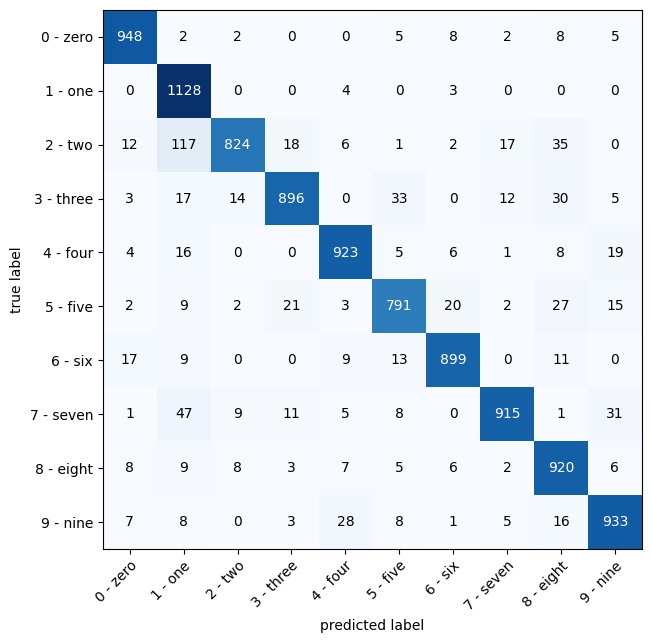

In [37]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix( conf_mat=confmat_tensor.numpy(),
					   class_names=class_names,
					   figsize=( 7, 7))